In [1]:
import numpy as np
import theano
import theano.tensor as T
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(0)

In [24]:
#creating test input
numPoints = 200
x = np.linspace(0, 20, numPoints)
data = np.sin(x)
data_rolled = np.roll(data, -1)
x_mat = np.matrix(x).T
data_mat = np.matrix(data).T
resp_mat = np.matrix(data_rolled).T
eta_val = 0.2

In [15]:
numPoints = 200
startTime = 0
stopTime = 20
time = np.linspace(startTime, stopTime, num=numPoints)
x = np.sin(time)
data = pd.DataFrame({"data":x, "response":x})
data.response = data.response.shift(-1)
#Not selecting the last point since the response is a Nan
data = data.iloc[:-1]

In [16]:
def _load_data(data, n_prev = 3):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.data.iloc[i:i+n_prev])
        docY.append(data.response.iloc[i+n_prev-1])
    alsX = np.array(docX)
    alsY = np.array(docY)

    return np.matrix(alsX), np.matrix(alsY).T

In [22]:
data_mat, resp_mat = _load_data(data)

In [18]:
resp_mat.shape

(196, 1)

In [10]:
from layers import LSTMLayer, InputLayer, FullyConnectedLayer
from lib import get_params, make_caches, SGD, momentum

In [ ]:
h,s = lstm.forward_step(np.ones(num_input), \
                        np.ones(num_cells), np.ones(num_cells))

In [30]:
num_input = 1
num_cells = 5
num_output = 1
X = T.matrix('x')
Y = T.matrix('y')
eta = T.scalar('eta')
alpha = T.scalar('alpha')
inputs = InputLayer(X, name="inputs")
lstm = LSTMLayer(num_input, num_cells, input_layer=inputs, name="lstm")
fc = FullyConnectedLayer(num_cells, num_output, input_layer=lstm)
Y_hat = T.mean(fc.output(), axis=2)
layer = inputs, lstm, fc
params = get_params(layer)
caches = make_caches(params)
mean_cost = T.mean((Y - Y_hat)**2)
last_cost = T.mean((Y[-1] - Y_hat[-1])**2)
#To run SGD uncomment below and comment momentum line
#updates = SGD(cost, params, eta, lambda2=0.1)
cost = alpha*mean_cost + (1-alpha)*last_cost
updates = momentum(cost, params, caches, eta, clip_at=3.0)
train = theano.function([X, Y, eta, alpha], [cost, last_cost] , updates=updates,\
                       allow_input_downcast=True)
costfn = theano.function([X, Y, alpha], [cost, last_cost], allow_input_downcast=True)
predict = theano.function([X], [Y_hat], allow_input_downcast=True)

In [26]:
costfn(data_mat, resp_mat, 1.0)

[array(0.49015372077586067), array(3.146540219285348e-08)]

In [57]:
lstm.W_fx.eval()

array([[-0.00323161,  0.00242587,  0.0099474 , -0.00138729, -0.00027877,
         0.00440768, -0.00982352, -0.01641294, -0.01847433,  0.00753694,
        -0.01076163,  0.00110762, -0.00789088,  0.00871257, -0.01722764,
        -0.00207719,  0.01256239,  0.0091235 , -0.0021716 , -0.01099967]])

In [29]:
data_mat.shape, resp_mat.shape

((200, 1), (200, 1))

In [33]:
n_iterations = 1000
for i in range(n_iterations):
    r_cost = train(data_mat, resp_mat, 0.5, 1.0)
    if i%10 == 0:
        print "iteration: %s, cost: %s" % (i, float(r_cost[0]))

iteration: 0, cost: 0.396625103602
iteration: 10, cost: 0.387844788001
iteration: 20, cost: 0.385990837057
iteration: 30, cost: 0.384855513423
iteration: 40, cost: 0.384634309244
iteration: 50, cost: 0.384407329301
iteration: 60, cost: 0.384249195743
iteration: 70, cost: 0.384088155023
iteration: 80, cost: 0.383941078718
iteration: 90, cost: 0.383796661511
iteration: 100, cost: 0.383656019685
iteration: 110, cost: 0.383517453745
iteration: 120, cost: 0.383381111754
iteration: 130, cost: 0.383246742878
iteration: 140, cost: 0.383114315044
iteration: 150, cost: 0.38298373813
iteration: 160, cost: 0.382854953206
iteration: 170, cost: 0.382727896361
iteration: 180, cost: 0.382602510383
iteration: 190, cost: 0.382478740905
iteration: 200, cost: 0.382356537626
iteration: 210, cost: 0.382235853726
iteration: 220, cost: 0.382116645757
iteration: 230, cost: 0.381998873426
iteration: 240, cost: 0.381882499364
iteration: 250, cost: 0.381767488862
iteration: 260, cost: 0.381653809629
iteration: 27

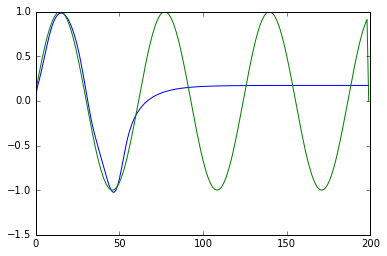

In [35]:
plt.plot(predict(x_mat)[0])
plt.plot(resp_mat)

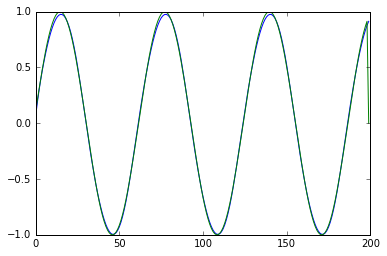

In [28]:
plt.plot(predict(data_mat)[0])
plt.plot(resp_mat)

Testing with basic_lstm.py

In [1]:
import numpy as np
#Setting the seed before other dependent imports
np.random.seed(0)

In [2]:
import theano
import theano.tensor as T
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from layers import LSTMLayer, InputLayer, FullyConnectedLayer
from lib import get_params, make_caches, SGD, momentum
from basic_lstm import basicLSTM

In [3]:
def _load_data(data, n_prev = 3):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.data.iloc[i:i+n_prev])
        docY.append(data.response.iloc[i+n_prev-1])
    alsX = np.array(docX)
    alsY = np.array(docY)

    return np.matrix(alsX), np.matrix(alsY).T

In [4]:
numPoints = 200
startTime = 0
stopTime = 20
time = np.linspace(startTime, stopTime, num=numPoints)
x = np.sin(time)
data = pd.DataFrame({"data":x, "response":x})
data.response = data.response.shift(-1)
#Not selecting the last point since the response is a Nan
data = data.iloc[:-1]

In [23]:
n_prev = 3
data_mat, resp_mat = _load_data(data, n_prev=n_prev)

In [6]:
lstm_model = basicLSTM(n_prev)

In [7]:
lstm_model.costfn(data_mat, resp_mat, 1.0)

[array(0.5002794491115484), array(0.8344074788520265)]

In [8]:
n_iterations = 100
for i in range(n_iterations):
    r_cost = lstm_model.train(data_mat, resp_mat, 0.5, 1.0)
    if i%10 == 0:
        print "iteration: %s, cost: %s" % (i, float(r_cost[0]))

iteration: 0, cost: 0.500279449112
iteration: 10, cost: 0.481134582443
iteration: 20, cost: 0.227940707387
iteration: 30, cost: 0.14098215336
iteration: 40, cost: 0.0886761005109
iteration: 50, cost: 0.0617232088905
iteration: 60, cost: 0.0543155208358
iteration: 70, cost: 0.0506504974447
iteration: 80, cost: 0.0468086099211
iteration: 90, cost: 0.0431522004036


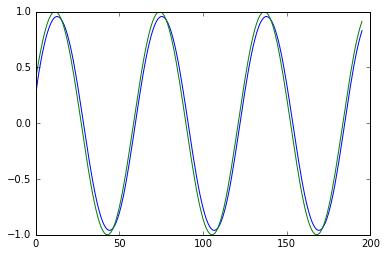

In [15]:
plt.plot(lstm_model.predict(data_mat)[0])
plt.plot(resp_mat)

In [15]:
dir(lstm_model.layers[0])

['X',
 '__doc__',
 '__init__',
 '__module__',
 'get_params',
 'load_model',
 'name',
 'output',
 'params',
 'reset_state',
 'save_model',
 'updates']

Irregular interval testing

In [2]:
import numpy as np
#Setting the seed before other dependent imports
np.random.seed(0)

In [7]:
import theano
import theano.tensor as T
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from layers import LSTMLayer, InputLayer, FullyConnectedLayer
from lib import get_params, make_caches, SGD, momentum
from basic_lstm import basicLSTM
import random

In [70]:
def basic_irregular(stopTime, numPoints, numSelPoints):
    time = np.linspace(0, stopTime, numPoints)
    data = np.sin(time)
    index = np.sort(np.random.choice(range(numPoints), size=numSelPoints, replace=False))
    time_irr = time[index]
    data_irr = data[index]
    delta_t = [0] + list(np.array(time_irr[1:]) - np.array(time_irr[:-1]))
    data_mat = np.matrix([list(data_irr), delta_t]).T
    data_mat = data_mat[:-1,:]
    resp_mat = np.matrix(np.roll(data_irr, -1)[:-1]).T
    time_vec = time_irr[1:]
    return data_mat, resp_mat, time_vec

In [71]:
stopTime = 20
numPoints = 400
numSelPoints = 60
data_mat, resp_mat, time_vec = basic_irregular(stopTime, numPoints, numSelPoints)

In [105]:
numCellArray = np.arange(5,30,5)

In [111]:
import os
graphs_path = os.path.join(os.getcwd(),'graphs')
store_path = os.path.join(graphs_path, 'irregular-time-intervals')

In [112]:
for num in numCellArray:
    numPath = os.path.join(store_path, str(num)+'cell_states')
    if not os.path.isdir(numPath):
        os.makedirs(numPath)

In [89]:
lstm_model = basicLSTM(2, num_cells=20)

In [98]:
n_iterations = 1000
for i in range(n_iterations):
    r_cost = lstm_model.train(data_mat, resp_mat, 0.3, 1.0)
    if i%100 == 0:
        print "iteration: %s, cost: %s" % (i, float(r_cost[0]))

iteration: 0, cost: 0.0112082859926
iteration: 100, cost: 0.0111366246071
iteration: 200, cost: 0.0111363787474
iteration: 300, cost: 0.0182549749613
iteration: 400, cost: 0.0107180718491
iteration: 500, cost: 0.0106322214573
iteration: 600, cost: 0.0106039927456
iteration: 700, cost: 0.0103316318723
iteration: 800, cost: 0.0103211671069
iteration: 900, cost: 0.0100609590313


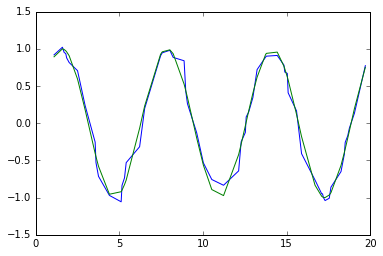

In [99]:
plt.plot(time_vec, lstm_model.predict(data_mat)[0])
plt.plot(time_vec, resp_mat)

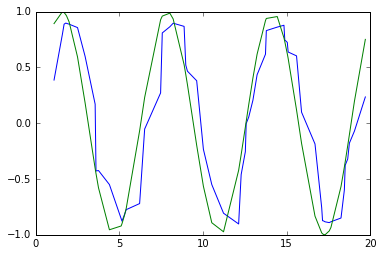

In [74]:
plt.plot(time_vec, lstm_model.predict(data_mat)[0])
plt.plot(time_vec, resp_mat)